# Exploratory Data Analysis

Exploratory Data Analysis mengacu pada proses kritis dalam melakukan investigasi awal pada data sehingga dapat menemukan pola, untuk menemukan anomali, untuk menguji hipotesis dan untuk memeriksa asumsi dengan bantuan statistik ringkasan dan representasi grafis.

## Titanic Dataset 

Pada kesempatan kali ini, kita akan mencoba melakukan EDA pada dataset Titanic. Dataset ini merupakan salah satu dataset yang paling populer, berisi tentang list-list setiap orang yang menaiki Titanic pada masanya yaitu 15 April 1912. Seperti yang kita tahu, Kapal Titanic tenggelam setelah bertabrakan dengan gunung es, menewaskan 1502 dari 2.224 penumpang dan awak. <br>
<br>
Tujuan dari tantangan ini adalah untuk menyelesaikan analisis tentang orang macam apa yang mungkin bertahan atau khususnya adalah menerapkan alat-alat pembelajaran mesin untuk memprediksi penumpang mana yang selamat dari tragedi itu. <br>
<br>
Tautan dari Kaggle: [Titanic](https://www.kaggle.com/c/titanic) 

In [1]:
import pandas as pd

Kita akan coba menggunakan package $\textbf{pandas}$, salah satu package powerful yang digunakan dengan bahasa python. <br>

> [Why Pandas](https://medium.com/fintechexplained/did-you-know-pandas-can-do-so-much-f65dc7db3051) <br>
> [How to install](https://pandas.pydata.org/pandas-docs/stable/install.html) <br>
> [Documentation](https://pandas.pydata.org/pandas-docs/stable/) <br>

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Jenis data apa saja yang kita miliki?

| Variable | Definition | Key   |
|------|------|------|
|   Survival  | Survival| 0 = No, 1 = Yes|
|   pclass  | Ticket class| 1 = 1st, 2 = 2nd, 3 = 3rd|
|   sex  | sex|  |
|   Age  | Age in years|  |	
|   sibsp  | # of siblings / spouses aboard the Titanic|  |	
|   parch  | # of parents / children aboard the Titanic|  |	
|   ticket  | Ticket number|  |	
|   fare	| Passenger fare |  |			
|   cabin	| Cabin number |  |			
|   embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |	

$\textbf{Variable Notes}$ <br>
- $\textbf{pclass}$ : A proxy for socio-economic status (SES) <br>
1st = Upper <br>
2nd = Middle <br>
3rd = Lower <br>

- $\textbf{age}$: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 <br>

- $\textbf{sibsp}$ : The dataset defines family relations in this way... <br>
Sibling = brother, sister, stepbrother, stepsister <br> 
Spouse = husband, wife (mistresses and fiancés were ignored) <br>

- $\textbf{parch}$: The dataset defines family relations in this way... <br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them. <br>

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Adakah data yang kosong (null)? 

In [6]:
df_train.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train = df_train.fillna(df_train.mean())
print (df_train.mean())
df_train.isnull().sum()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


C:\Users\user\AppData\Local\Temp/ipykernel_6300/3330434094.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train = df_train.fillna(df_train.mean())
C:\Users\user\AppData\Local\Temp/ipykernel_6300/3330434094.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print (df_train.mean())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Melihat Statistik dari Data

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


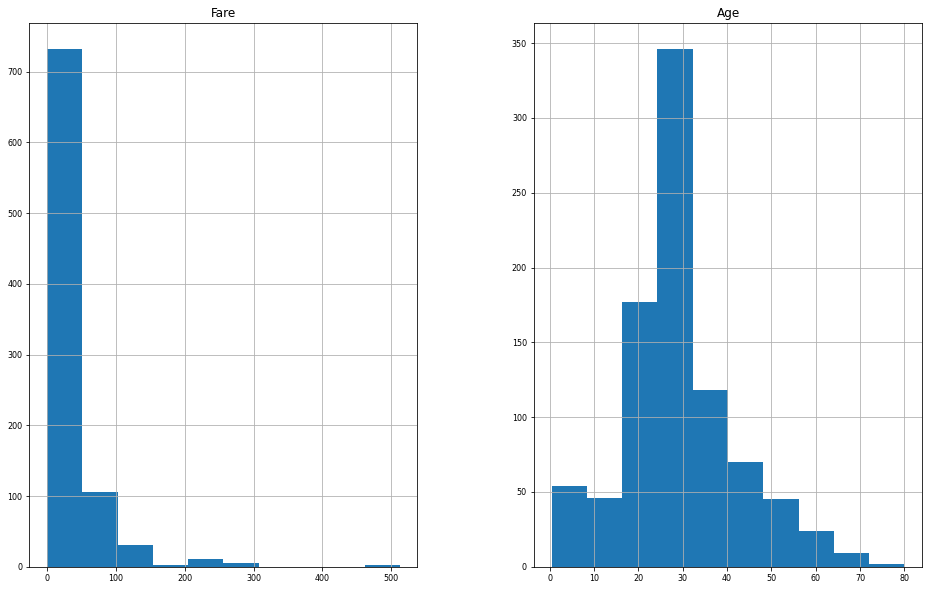

In [9]:
df_train[['Fare', 'Age']].hist(figsize=(16, 10), xlabelsize=8, ylabelsize=8);

## Berapa jumlah orang selamat? 

In [10]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df_train.pivot_table(['Survived'], ['Sex']).sort_values(by = ['Survived'], ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
df_train.pivot_table(['Survived'], ['Sex', 'Pclass']).sort_values(by = ['Survived'], ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

Jika kita lihat dari data, presentase selamat paling tinggi dimiliki oleh Wanita ketimbang pria, jika ditelusuri lebih dalam, wanita dengan Pclass 1 memiliki presentase selamat tertinggi ketimbang penumpang lainnya.

## Bagaimana dengan orang yang berpergian sendiri?

In [13]:
Alone = [0 for k in range(len(df_train))]
for p in range(len(df_train)):
    if df_train['SibSp'][p] == 0 and df_train['Parch'][p] == 0:
        Alone[p] = 1

In [14]:
df_train = df_train.assign(IsAlone =Alone)
df_train['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [15]:
df_train.pivot_table(['Survived'], ['IsAlone']).sort_values(by = ['Survived'], ascending = False)

,Survived
IsAlone,
0,0.505650
1,0.303538


## Korelasi antar variable

In [16]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsAlone
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.135207
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.179775
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.583398
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.271832
IsAlone,0.057462,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,1.000000


Korelasi dengan Pandas package: <br>
- $\textbf{Pearson}$ (linear relationship)
- $\textbf{Spearman & Kendall}$ rank correlation (non-linear) <br>
<br>

Korelasi ini digunakan untuk $\textbf{korelasi dua variabel kontinu}$
> [Dokumentasi](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

### HATI-HATI!!

$\textbf{Penggunaan korelasi berbeda-beda tergantung tipe data yang kita hadapi.}$ 
<br> 
> baca [disini](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365) untuk lebih lengkapnya!

![Image of Yaktocat](https://miro.medium.com/max/1200/1*6KNXPv-_3s7cJrcOQxbZCw.png)

Point Biserial secara matematis equivalen dengan Korelasi Pearson, Point Biserial digunakan ketika kita ingin mencari korelasi antara variabel dikotomus dengan variabel kontinu. Kita akan coba melihat korelasi antara variabel Survived (dikotomus, bernilai biner) terhadap variabel-variabel kontinu yang kita miliki (Age dan Fare).

In [17]:
df_corr = df_train[['Survived', 'Age', 'Fare']]
df_corr.loc[:, 'Age'] = df_corr.loc[:, 'Age'].round()
corr = df_corr.corr()['Survived'][1:]
print('Korelasi dengan variable Survived: ', '\n', corr)

Korelasi dengan variable Survived:  
 Age    -0.070324
Fare    0.257307
Name: Survived, dtype: float64


c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Visualisasi

Visualisasi dan EDA (Exploratory Data Analysis) sangat berkaitan erat, visualisasi digunakan untuk mempermudah memahami EDA dan juga menjadi bentuk laporan (report) atas pekerjaan yang telah kita lakukan. Kita akan mencoba melakukan visualisasi terhadap EDA yang telah kita lakukan.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Kita akan menggunakan dua jenis package visualisasi, kedua package ini sangat popular dan memiliki banyak library visualisasi yang cukup lengkap
> [Matplotlib](https://matplotlib.org/3.1.1/contents.html) <br>
> [Seaborn](https://seaborn.pydata.org/) <br>
> [Contoh Visualisasi](https://python-graph-gallery.com/) <br>
> [Visualisasi Titanic](https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-1/)

## Jumlah orang yang selamat serta kaitannya dengan umur, jenis kelamin dan kelas penumpang

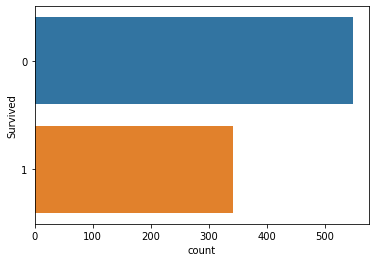

In [19]:
sns.countplot(y = 'Survived', data = df_train);

In [20]:
df_train.pivot_table(['Survived'], ['Sex', 'Pclass']).sort_values(by = ['Survived'], ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

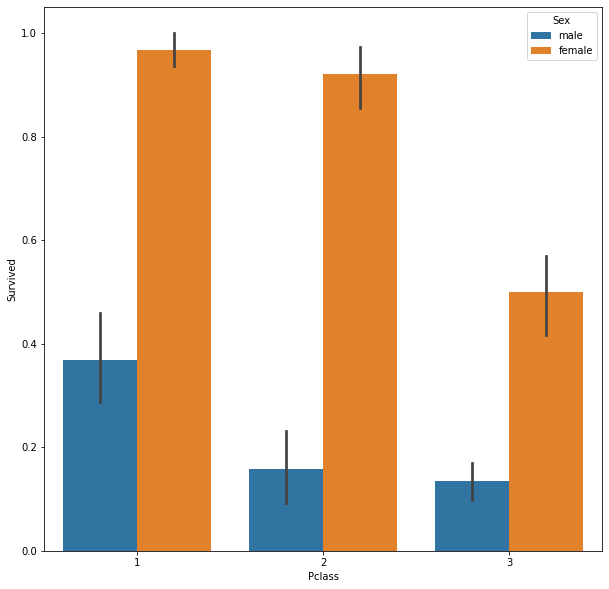

In [27]:
fig, ax = plt.subplots(1, 1, figsize  =(10,10))
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, ax = ax);

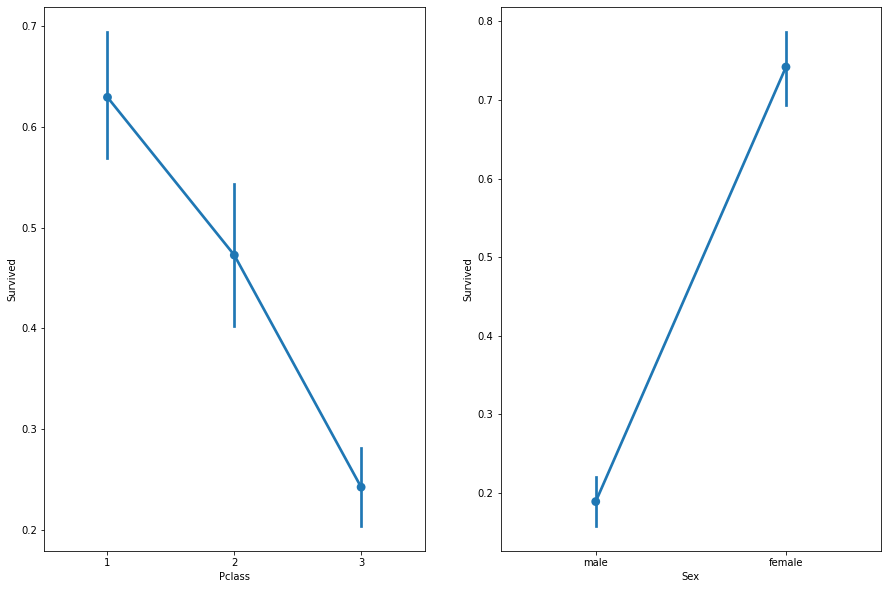

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,10))
sns.pointplot(x = 'Pclass', y = 'Survived', data = df_train, ax = ax1)
sns.pointplot(x = 'Sex', y = 'Survived', data = df_train, ax = ax2);

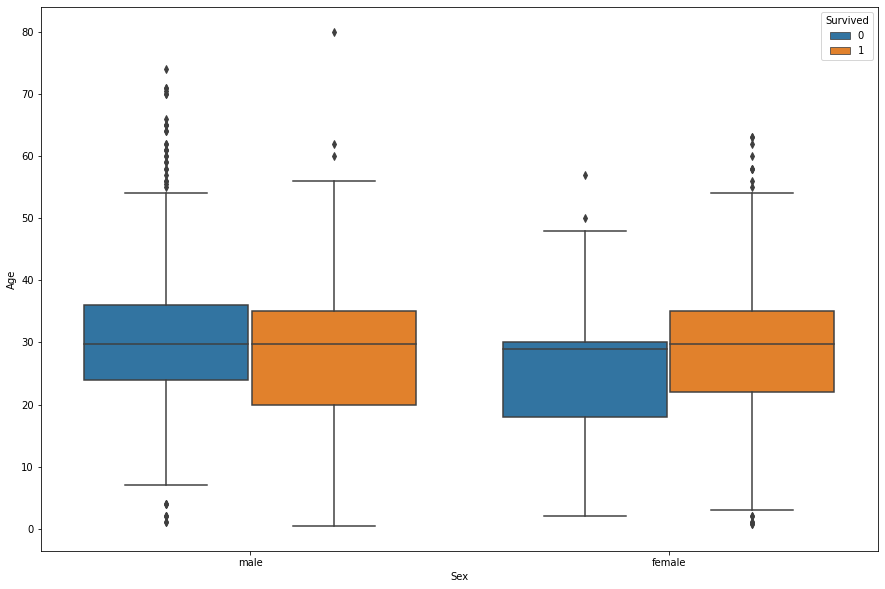

In [30]:
fig, ax = plt.subplots(1, 1, figsize  =(15,10))
sns.boxplot(x='Sex', y='Age', data=df_train, hue="Survived");

## Visualisasi Korelasi

<AxesSubplot:>

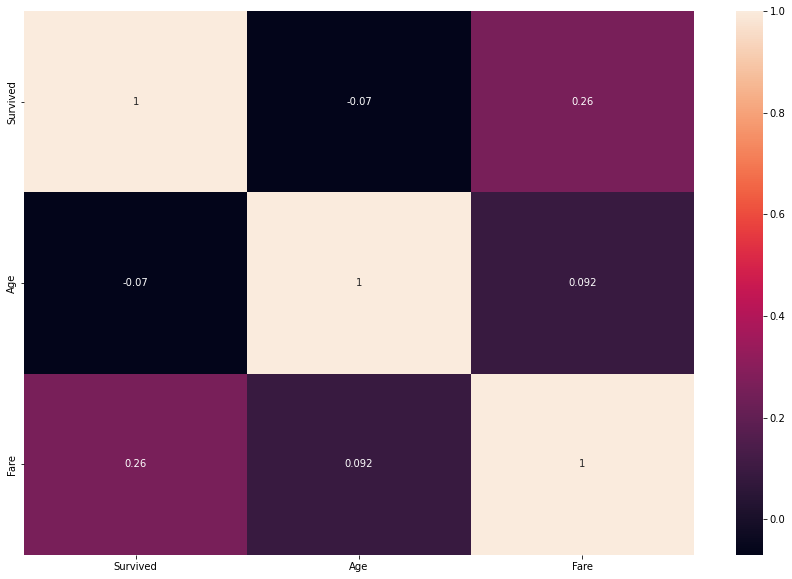

In [33]:
df_corr = df_train[['Survived', 'Age', 'Fare']]
fig, ax = plt.subplots(1, 1, figsize = (15,10))
sns.heatmap(df_corr.corr(), annot = True)

## Bagaimana cara memilih visualisasi yang tepat?

Salah satu bagian terpenting dalam membuat visualisasi adalah menetukan visualisasi yang tepat sesuai dengan tujuan yang ingin dimunculkan. [sumber](https://verstaresearch.com/blog/how-to-select-the-type-of-chart-to-use/)

![how to pick visualization](https://verstaresearch.com/wp-content/uploads/2010/01/VB2010-01-29A.jpg)

### Lakukan dengan kreativitas dan pemilihan visualisasi yang tepat untuk hubungan antara IsAlone dengan jenis kelamin, kelas penumpang dan umur!

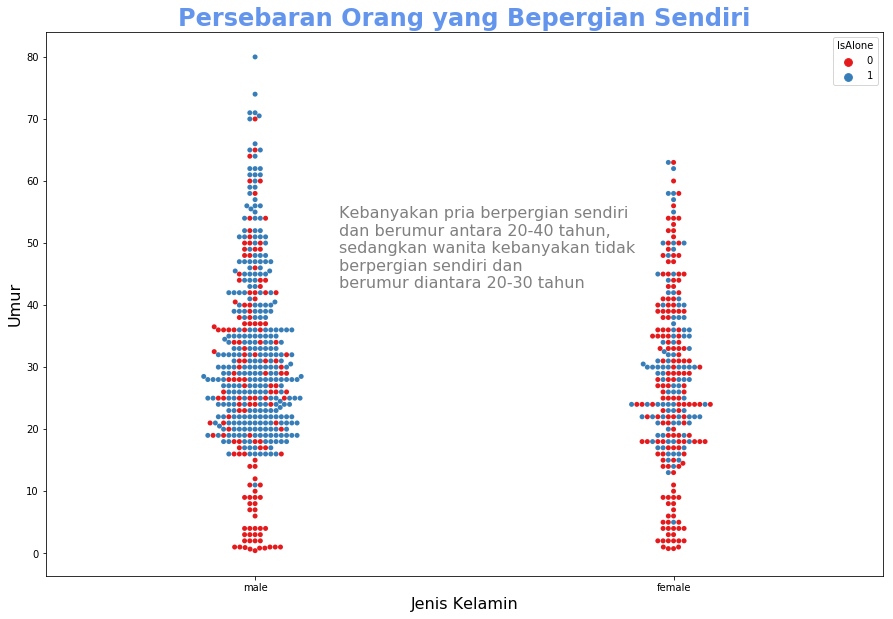

In [32]:
df_train = pd.read_csv('train.csv')
Alone = [0 for k in range(len(df_train))]
for p in range(len(df_train)):
    if df_train['SibSp'][p] == 0 and df_train['Parch'][p] == 0:
        Alone[p] = 1

df_train = df_train.assign(IsAlone =Alone)
df_train['IsAlone'].value_counts()

fig, ax = plt.subplots(1, 1, figsize  =(15,10))
sns.swarmplot(x='Sex', y='Age', data=df_train, hue='IsAlone', palette='Set1')

insight = '''
Kebanyakan pria berpergian sendiri
dan berumur antara 20-40 tahun, 
sedangkan wanita kebanyakan tidak
berpergian sendiri dan 
berumur diantara 20-30 tahun
'''

ax.text(0.5,85,'Persebaran Orang yang Bepergian Sendiri',horizontalalignment='center',color='cornflowerblue',fontsize=24,fontweight='bold')
ax.text(0.2,40,insight,horizontalalignment='left',color='grey',fontsize=16,fontweight='normal')
ax.set_xlabel('Jenis Kelamin', fontsize=16)
ax.set_ylabel('Umur', fontsize=16);

# Bekerja dengan Scikit-learn

Scikit-learn URL: https://scikit-learn.org/stable/

In [3]:
%%HTML
<iframe src='https://scikit-learn.org/stable/' width = 100% height=500 ></iframe>

# Regresi 

## Boston House Pricing

Dataset ini berisi informasi yang dikumpulkan oleh Layanan Sensus A.S. mengenai perumahan di area Massa Boston. Ini diperoleh dari arsip StatLib (http://lib.stat.cmu.edu/datasets/boston),

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape)

df_boston = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= list(boston['feature_names'])+['MEDV'])
df_boston.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

## EDA

In [58]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


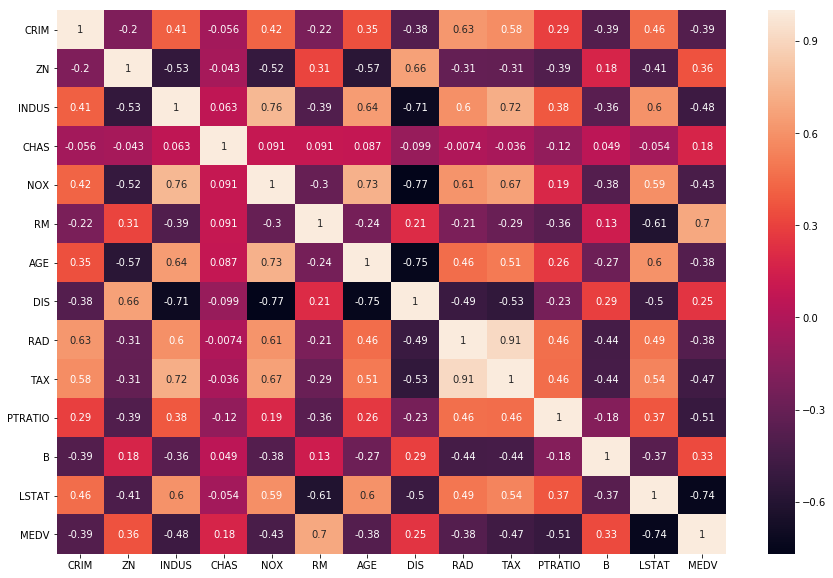

In [57]:
plt.figure(figsize = (15,10))
sns.heatmap(df_boston.corr(), annot = True)

## Regresi Linear Sederhana 

In [6]:
X = df_boston['RM'].values.reshape(-1,1)

NameError: name 'df_boston' is not defined

In [45]:
y = df_boston['MEDV'].values

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()

In [5]:
model.fit(X, y)

NameError: name 'X' is not defined

In [49]:
model.coef_

array([9.10210898])

In [50]:
model.intercept_

-34.67062077643857

In [63]:
print('Prediksi harga rumah yang memiliki 12 kamar: {:.2f} $'.format(float(model.predict(np.array([[12]])))))

'Prediksi harga rumah yang memiliki 12 kamar: 74.55 $'

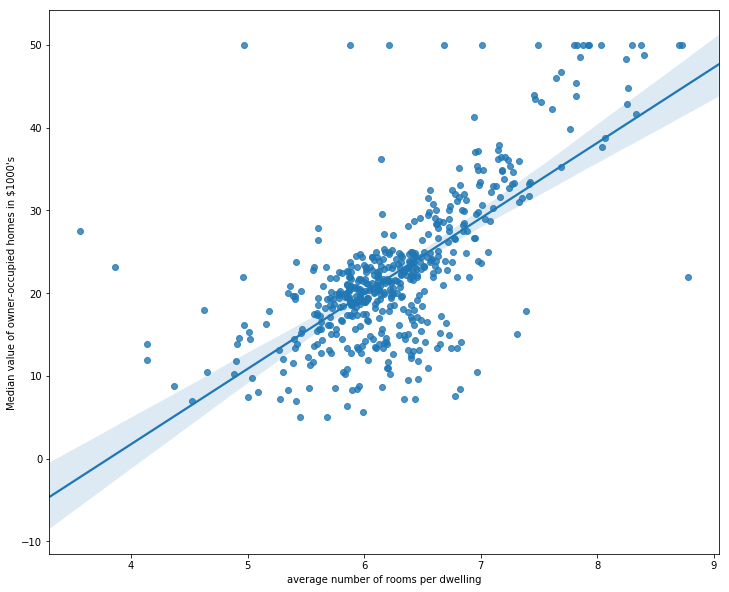

In [35]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

/home/figarrikeisha/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


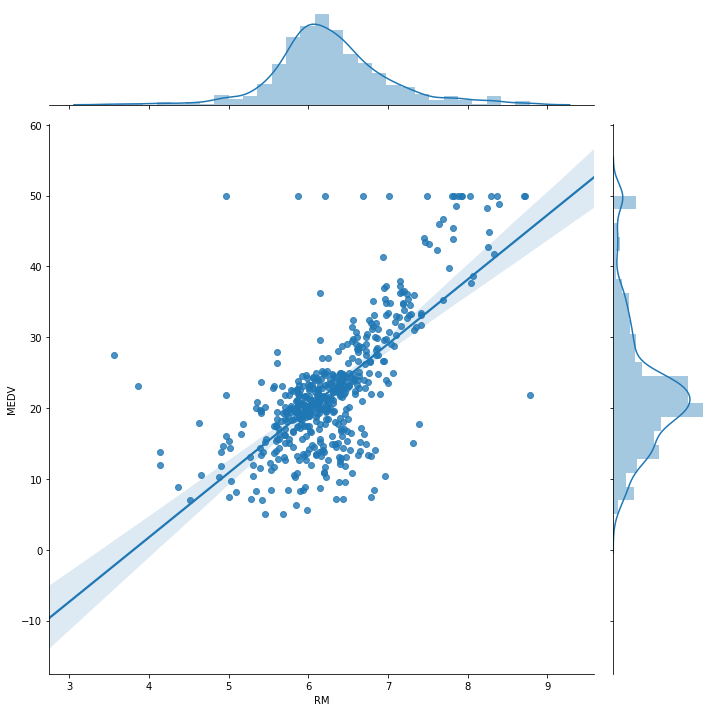

In [36]:
sns.jointplot(x='RM', y='MEDV', data=df_boston, kind='reg', size=10);
plt.show();

## Evaluasi Regresi

In [37]:
from sklearn.model_selection import train_test_split

X = df_boston.iloc[:, :-1].values
y = df_boston['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

### Mean Squared Error (MSE)

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [40]:
mean_squared_error(y_test, y_test_pred)

33.44897999767643

### Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_train, y_train_pred)

0.7730135569264234

In [43]:
r2_score(y_test, y_test_pred)

0.589222384918252

# Klasifikasi

Regresi Logistik digunakan untuk klasifikasi biner. Regresi logistik menggunakan $\textbf{fungsi sigmoid}$, kurva berbentuk S yang dapat mengambil angka bernilai nyata dan memetakannya menjadi nilai antara 0 dan 1

$$\frac{1}{1 + e^{-x}}$$

$e$ adalah basis dari logaritma natural dan x adalah nilai yang ingin Anda ubah melalui fungsi logistik.

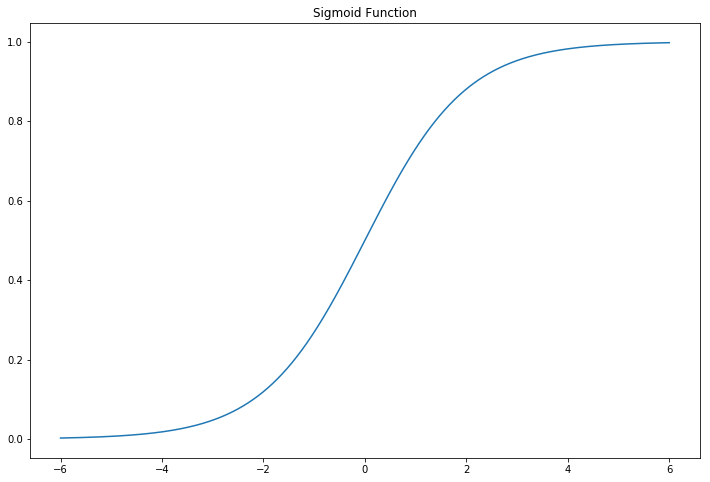

In [64]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (12,8))
plt.plot(x, 1 / (1 + np.exp(-x))); # Sigmoid Function
plt.title("Sigmoid Function");

## Regresi Logistik dengan Data Titanic

In [80]:
df_train = pd.read_csv('train.csv')
df_train = df_train.fillna(df_train.mean())
print (df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
X = df_train['Age'].values.reshape(-1,1)

In [82]:
y = df_train['Survived'].values

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logres = LogisticRegression()

In [85]:
logres.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
print('0 berarti tidak selamat, 1 berarti selamat', '\n')
print('Prediksi orang yang berumur 50 tahun: {}'.format(str(logres.predict(np.array([[50]])))))

0 berarti tidak selamat, 1 berarti selamat 

Prediksi orang yang berumur 50 tahun: [0]


In [103]:
print('Probabilitas orang yang berumur 50 tahun: ', '\n')
print('Probabilitas selamat {:.2f}'.format(float(logres.predict_proba(np.array([[50]]))[0,0])))
print('Probabilitas tak selamat {:.2f}'.format(float(logres.predict_proba(np.array([[50]]))[0,1])))

Probabilitas orang yang berumur 50 tahun:  

Probabilitas selamat 0.67
Probabilitas tak selamat 0.33


## Evaluasi Klasifikasi

### Confusion Matrix

In [113]:
from sklearn.model_selection import train_test_split

train = df_train.drop(['PassengerId'], axis = 1)
X = train._get_numeric_data().drop('Survived', axis = 1).values
y = train['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logres = LogisticRegression()
logres.fit(X_train, y_train)

y_train_pred = logres.predict(X_train)
y_test_pred = logres.predict(X_test)

[[385  54]
 [159 114]]


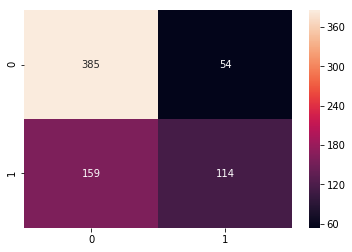

In [119]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt='.0f');

![image](https://miro.medium.com/max/712/1*g5zpskPaxO8uSl0OWT4NTQ.png)

### Precision

**Precision** mengukur akurasi dari prediksi positif.

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

In [120]:
from sklearn.metrics import precision_score, recall_score

In [121]:
precision_score(y_train, y_train_pred) # 5618 / (574 + 5618)

0.6785714285714286

### Recall

`Precision` merupakan rasio dari sample positif yang benar ditebak oleh model klasifikasi.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

In [122]:
recall_score(y_train, y_train_pred)

0.4175824175824176

### F1 Score

$F_1$ score adalah rata-rata harmonik dari presisi dan recall


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$


In [123]:
from sklearn.metrics import f1_score

In [124]:
f1_score(y_train, y_train_pred)

0.5170068027210885

# Data Preprocessing

## Feature Scaling

[Sklean preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

Sebagian besar machine learning membutuhkan data standar yang terdistribusi normal. Gaussian dengan rata-rata dan dan varian unit nol. Terdapat beberapa cara untuk melakukan feature scaling:

- Standardization / Mean Removal

- Min-Max or Scaling Features to a Range

- Normalization

- Binarization

In [125]:
from sklearn import preprocessing

In [126]:
X_train = np.array([[ 1., -5.,  3.],
                    [ 1.,  -2.,  0.],
                    [ 12.,  1., -4.]])

In [127]:
X_train.mean(axis=0)

array([ 4.66666667, -2.        , -0.33333333])

### Standardization / Mean Removal / Variance Scaling

[scikit Scale](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)

Pada kesempatan kali ini kita hanya akan membahas standarisasi

Standarisasi data dengan membuat data memiliki rata-rata 0 dan standar deviasi 1

$$X'=\frac{X-\bar{X}}{\sigma}$$

In [135]:
X_scaled = preprocessing.scale(X_train)

In [136]:
X_scaled

array([[-0.70710678, -1.22474487,  1.16247639],
       [-0.70710678,  0.        ,  0.11624764],
       [ 1.41421356,  1.22474487, -1.27872403]])

Scaled data has zero mean and unit variance:

In [137]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [138]:
X_scaled.std(axis=0)

array([1., 1., 1.])

Hal yang harus diingat, adalah ketika kita telah melakukan standarisasi pada data train kita, kita juga harus melakukannya pada data test kita. Untuk dapat melakukannya, kita dapat menggunakan `StandardScaler`

[Sklearn StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [139]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [140]:
scaler.mean_

array([ 4.66666667, -2.        , -0.33333333])

In [141]:
scaler.scale_

array([5.18544973, 2.44948974, 2.86744176])

In [142]:
scaler.transform(X_train)

array([[-0.70710678, -1.22474487,  1.16247639],
       [-0.70710678,  0.        ,  0.11624764],
       [ 1.41421356,  1.22474487, -1.27872403]])

Sekarang kita dapat mengubah data test kita

In [143]:
X_test = [[-1., 1., 0.]]

In [144]:
scaler.transform(X_test)

array([[-1.09280139,  1.22474487,  0.11624764]])

## Label Encoding

### Label Encoder

[LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [145]:
source = ['kangguru', 'zebra', 'gajah', 'harimau']

In [146]:
le = preprocessing.LabelEncoder()
src = le.fit_transform(source)

In [149]:
print("Nama-nama hewan menggunakan label encoder:\n") 
for k, v in enumerate(le.classes_): 
    print(v,'\t', k)

Nama-nama hewan menggunakan label encoder:

gajah 	0
harimau 	1
kangguru 	2
zebra 	3


In [150]:
test_data = ['zebra', 'gajah', 'gajah', 'harimau']

In [151]:
result = le.transform(test_data) 
print(result)

[3 0 0 1]


### One Hot / One-of-K Encoding

Proses untuk merubah data kategorikal menjadi suatu set data biner

[One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [152]:
source

['kangguru', 'zebra', 'gajah', 'harimau']

In [153]:
from sklearn.preprocessing import OneHotEncoder

In [154]:
one_hot_enc = OneHotEncoder(sparse=False)
src = src.reshape(len(src), 1)
one_hot = one_hot_enc.fit_transform(src)
print(one_hot)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


/home/figarrikeisha/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [157]:
invert_res = le.inverse_transform([np.argmax(one_hot[0, :])])
print(invert_res)

['kangguru']


# Tantangan!

Buat lah suatu model klasifikasi sederhana dengan menggunakan dataset Titanic,

1. Lakukan EDA dan juga visualisasi, temukan insight-insight menarik data tampilkan dengan visualisasi yang tepat!

2. Lakukan data preprocessing untuk mengubah data numerik dengan menggunakan feature scaling dan data kategorikal dengan menggunakan label encoding

3. Evaluate hasilnya! dan coba bandingkan hasil evaluasi sebelum dan sesudah menggunakan data preprocessing! Coba juga untuk jenis data preprocessing yang lain

4. Lakukan submission hasil tersebut di [kaggle](https://www.kaggle.com/c/titanic/submit)

# Tambahan

Masih banyak materi lain yang harus dikejar setelah melalui materi-materi dasar yang ada disini, jika kalian tertarik untuk belajar lebih lanjut sedikit panduan, coba baca atau belajar mengenai hal-hal berikut:

- Robust Regression, OLS Regression, Ploynomial Regression, Multiple Regression

- Cross Validation Train-Test Data

- Variance Bias Trade Off

- Feature Importance

- Classification Models, such Decision Tree, KNN Classifier, etc.

Sekian dan terima kasih

Figarri Keisha, <br>
29 Juli 2019

Inspired by codestars.com